#### Narges Babaahmadi
#### MLP from scratch
#### Importing needed libraries

In [1]:
import numpy as np
import random

#### Constructing MLP class

In [2]:
class MLP(object):
    # num_inputs is the number of neurons in input layer
    # hidden_layers is a list that include number of neurons of each layer
    # num_outputs stores the number of neurons in the output layer
    def __init__(self, num_inputs, hidden_layers, num_outputs):

        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # initializing the weights with random values
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # save derivatives per layer
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives

        # save activations per layer
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations

#### sigmoid function

In [3]:
class MLP(MLP):
    def sigmoid(self, x):
        r = 1.0 / (1 + np.exp(-x))
        return r

#### Derivative of sigmoid function

In [4]:
class MLP(MLP):
    def Sderivative(self, x):
        r = x * (1.0 - x)
        return r

#### gradient descent

In [5]:
class MLP(MLP):
    def gradient_descent(self, alpha):
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * alpha

#### Forward pass step

In [6]:
class MLP(MLP):
    def forward_propagate(self, inputs):
        # the input layer activation is just the input itself
        activations = inputs

        self.activations[0] = activations

        # iterate through the network layers
        for i, w in enumerate(self.weights):
            net_inputs = np.dot(activations, w)

            # apply sigmoid activation function
            activations = self.sigmoid(net_inputs)

            self.activations[i + 1] = activations

        # return output layer activation
        return activations

#### Back propagation step

In [7]:
class MLP(MLP):
    def back_propagate(self, error):

        # iterate backwards through the network layers
        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]

            # apply sigmoid derivative function
            delta = error * self.Sderivative(activations)

            # reshape delta as to have it as a 2d array
            delta_re = delta.reshape(delta.shape[0], -1).T

            current_activations = self.activations[i]

            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0],-1)

            self.derivatives[i] = np.dot(current_activations, delta_re)
            
            error = np.dot(delta, self.weights[i].T)

#### Function to train our network

In [8]:
class MLP(MLP):
    def train(self, inputs, targets, epochs, alpha):

        for i in range(epochs):
            sum_errors = 0
            
            for j, input in enumerate(inputs):
                target = targets[j]
                output = self.forward_propagate(input)
                error = target - output

                self.back_propagate(error)
                
                self.gradient_descent(alpha)

        print("Training complete!")

#### Function to read test and train files

In [9]:
def file_read(file_name):
    file = open(file_name)
    input_raw = file.read()
    file.close()
    input_mat = input_raw.split('\n')
    items = []
    targets = []
    for i in range(len(input_mat)-1):
        help_arr = []
        x = input_mat[i].split()
        # print(x)
        help_arr.append(float(x[0]))
        help_arr.append(float(x[1]))
        items.append(help_arr)
        targets.append([int(x[2])])
    items = np.array(items)
    targets = np.array(targets)
    return items, targets

#### Main function

In [27]:
if __name__ == "__main__":
    items , targets = file_read("train")
    
    # create a Multilayer Perceptron with two hidden layers
    mlp = MLP(2, [20,20], 1)

    mlp.train(items, targets, 100, 0.1)
    
    
    inputs, target = file_read("test")
    
    #getting prediction
    output = mlp.forward_propagate(inputs)
    
    for i in range(len(output)):
        if output[i] > 0.5:
            output[i] = 1
        else:
            output[i] = 0
    check = 0
    wrongs = []
    for i in range(len(output)):
        if output[i] != target[i]:
            check += 1
            wrongs.append(inputs[i])
    v = 1000 - check
    print("accuracy :", end=" ")
    print(v/10)

Training complete!
accuracy : 93.8


As you see the best accuracy i got was 93.8 and i achieved it using 2 hidden layers, each having 20 neurons.

#### points that are predicted wrong

In [28]:
print("wrong predicted data :")
print(wrongs)

wrong predicted data :
[array([-0.63368781,  0.46984654]), array([ 0.02052918, -0.74106431]), array([0.23047427, 1.3218883 ]), array([ 0.20850235, -1.50069896]), array([0.50492571, 1.33289141]), array([-0.02590112, -0.63746317]), array([-0.18255429, -0.59171687]), array([-0.29985468,  0.08154997]), array([-0.7483894 , -0.51972681]), array([-0.180833  , -1.37166912]), array([ 1.00480338, -2.24461118]), array([-0.28756905,  0.10411097]), array([ 0.22535723, -1.73359793]), array([-0.84259294, -1.40771658]), array([-0.2675737 , -1.60862594]), array([ 0.52330092, -1.22786949]), array([ 0.40379943, -1.22460592]), array([ 0.02890577, -0.72352707]), array([ 0.95927101, -2.68560886]), array([ 0.08762527, -1.1504663 ]), array([ 0.33942015, -1.93150785]), array([ 0.24488748, -1.53440147]), array([ 0.62708273, -1.52628   ]), array([-1.38032856, -0.50102086]), array([ 0.31439824, -1.16014834]), array([-0.05466003, -0.81771656]), array([-0.36688013,  0.46480537]), array([ 0.34958823, -0.53002099]), 

In [29]:
x_output_zero = []
y_output_zero = []
x_output_one = []
y_output_one = []
for i in range(len(output)):
    if(output[i]==0):
        x_output_zero.append(inputs[i][0])
        y_output_zero.append(inputs[i][1])
    else:
        x_output_one.append(inputs[i][0])
        y_output_one.append(inputs[i][1])

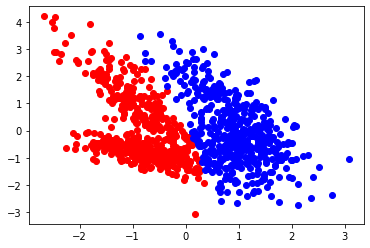

In [30]:
from matplotlib import pyplot as plt
plt.scatter(x_output_zero,y_output_zero,color='red')
plt.scatter(x_output_one,y_output_one,color='blue')
plt.show()

#### Blue points are the ones that are predicted to be 1 ,and red points are the one that predicted to be zero